In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('Libro1.xlsx')
df.head()

In [3]:
print(df.groupby(['severity']).agg(['max','min','mean','median']))
print(); print('****************************************************************************')

           age                         shape                       margin  \
           max   min       mean median   max  min      mean median    max   
severity                                                                    
0.0       86.0  18.0  49.303738   50.0   4.0  1.0  2.105140    2.0    5.0   
1.0       96.0  28.0  62.652605   64.0   4.0  1.0  3.503722    4.0    5.0   

                               density                        
          min      mean median     max  min      mean median  
severity                                                      
0.0       1.0  1.943925    1.0     4.0  1.0  2.892523    3.0  
1.0       1.0  3.739454    4.0     4.0  1.0  2.940447    3.0  

****************************************************************************


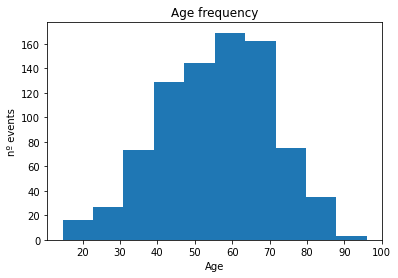

In [4]:
plt.hist(df['age']);
plt.xlabel('Age'); plt.ylabel('nº events'); plt.title('Age frequency');

In [5]:
df.replace([np.inf, -np.inf], np.nan)
print(df.isna().sum())

df.dropna(axis=0, inplace = True)
print(df.isna().sum())

severity    2
age         0
shape       2
margin      2
density     2
dtype: int64
severity    0
age         0
shape       0
margin      0
density     0
dtype: int64


In [6]:
X = df.loc[:, ['age', 'shape', 'margin', 'density']].values;
y = df.loc[:, ['severity']].values.astype(int);

In [18]:
def logRegr(X,y):

    !pip install scikit-learn
    import sklearn
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import f1_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import recall_score
    
    # Normalizing X
    X = StandardScaler().fit(X).transform(X)

    # Setting training and test data from the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, shuffle=True);
    X_train = np.around(X_train, decimals = 3)
    X_test = np.around(X_test, decimals = 3)

    # We train the binary logistic regression model and fit
    clf = LogisticRegression(solver='lbfgs',max_iter=3000).fit(X_train, y_train)
    
    # Predicted values from X_test
    y_hat = clf.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_hat)
    prec = average_precision_score(y_test, y_hat, average='macro')
    rec = recall_score(y_test, y_hat, average='macro')
    f1scor = f1_score(y_test,y_hat,average='binary')
    
    # We will now calculate the ROC AUC and plot it
    # Learn to predict each class against the other
    y_score = clf.fit(X_train, y_train).decision_function(X_test)

    # Compute ROC curve, ROC area and plot it
    fpr, tpr, threshold = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    print('ROC AUC: ', roc_auc)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC for binary logistic regression ')
    plt.legend(loc="lower right")
    plt.show()
    
    return[acc, prec, rec, f1scor, X_train, X_test, y_train, y_test, y_hat]
    ;

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ROC AUC:  0.8932275132275133


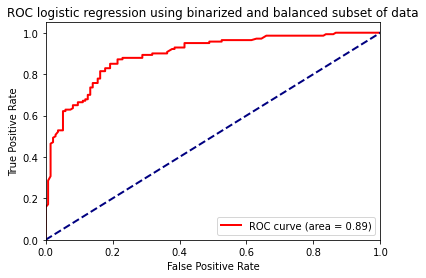

[0.8072727272727273,
 0.7605462476454843,
 0.8078042328042327,
 0.8044280442804428,
 array([[ 1.107,  0.98 ,  1.396,  0.24 ],
        [ 0.22 , -0.631, -1.159,  0.24 ],
        [ 1.653,  0.98 ,  0.118,  0.24 ],
        ...,
        [-0.804,  0.98 ,  0.757, -2.613],
        [ 0.083, -0.631,  0.757,  0.24 ],
        [-0.258,  0.98 ,  0.757,  0.24 ]]),
 array([[-0.735, -0.631, -0.52 ,  0.24 ],
        [ 1.38 ,  0.98 ,  0.118,  0.24 ],
        [ 0.425, -0.631, -1.159,  0.24 ],
        ...,
        [-0.804,  0.98 ,  1.396,  0.24 ],
        [ 0.288, -0.631, -1.159, -2.613],
        [-0.394,  0.98 ,  1.396,  0.24 ]]),
 array([[1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
     

In [19]:
logRegr(X,y)

In [ ]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Scikit-learn lib Installed!
